<a href="https://colab.research.google.com/github/thibaud-perrin/llm-evaluation/blob/main/notebooks/lighteval_evaluate_and_analyse_your_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating and Comparing LLMs with `lighteval`

This notebook demonstrates how to use `lighteval`, an AI evaluation library, to compare and evaluate language models (LLMs) on specific benchmarks.

## Introduction to `lighteval`
We start by exploring the capabilities of `lighteval` as a library for evaluating LLMs on major benchmarks. The notebook is using  `lighteval` step-by-step for evaluating and comparing models, particularly in a domain-specific context.



## Secrets
Loading HuggingFace secret and login to huggingFace

In [1]:
from google.colab import userdata
TOKEN = userdata.get('HF_TOKEN')

## Libraries

In [2]:
!pip install -qqq -U "torch<2.5" "torchvision<2.5" "torchaudio<2.5" --index-url https://download.pytorch.org/whl/cu121
!pip list | grep torch

torch                              2.4.1+cu121
torchaudio                         2.4.1+cu121
torchsummary                       1.5.1
torchvision                        0.19.1+cu121


In [3]:
!pip install -qqq lighteval tiktoken

In [4]:
!pip show lighteval

Name: lighteval
Version: 0.7.0
Summary: A lightweight and configurable evaluation package
Home-page: https://github.com/huggingface/lighteval
Author: 
Author-email: Clémentine Fourrier <clementine@huggingface.com>, Nathan Habib <nathan.habib@huggingface.com>, Thomas Wolf <thom@huggingface.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: accelerate, aenum, colorlog, datasets, fsspec, GitPython, huggingface_hub, nltk, numpy, protobuf, pycountry, pytablewriter, rich, rouge_score, sacrebleu, scikit-learn, sentencepiece, spacy, termcolor, torch, transformers, typer
Required-by: 


In [7]:
# Import necessary libraries
import lighteval
import os
from datetime import timedelta
from transformers import AutoModelForCausalLM

from lighteval.logging.evaluation_tracker import EvaluationTracker
from lighteval.pipeline import EnvConfig, ParallelismManager, Pipeline, PipelineParameters

## Setting Up `lighteval` for Evaluation
Here, we set up the evaluation environment and pipeline. The notebook configures the necessary components to perform evaluations within a controlled environment, keeping things notebook-friendly for simplicity.

In [8]:
env_config = EnvConfig(token=TOKEN, cache_dir="~/tmp")

evaluation_tracker = EvaluationTracker(
    output_dir="~/tmp",
    save_details=False,
    push_to_hub=False,
    push_to_tensorboard=False,
    public=False,
    hub_results_org=False,
)

pipeline_params = PipelineParameters(
    launcher_type=ParallelismManager.ACCELERATE,
    env_config=env_config,
    job_id=1,
    override_batch_size=1,
    num_fewshot_seeds=0,
    max_samples=10,
    use_chat_template=False,
)

## Comparing Models on a Domain-Specific Benchmark
In this section, we compare two smaller LLMs, `Qwen2.5-0.5B` and `SmolLM2-360M-Instruct`, on tasks from the medical domain. We evaluate these models using a subset of tasks from the MMLU (Massive Multitask Language Understanding) benchmark.

The evaluation tasks are specified in `lighteval` using the following format:


```

{suite}|{task}:{subtask}|{num_few_shot}|{reduce_few_shot}

```

For this notebook, we define our evaluation tasks as:


```

"leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"

```

Which translates to:

| Suite         | Task                   | Num Fewshot Example | Limit Fewshots |
|---------------|------------------------|----------------------|----------------|
| leaderboard   | mmlu:anatomy           | 5                    | False          |
| leaderboard   | mmlu:professional_medicine | 5                | False          |
| leaderboard   | mmlu:high_school_biology  | 5                | False          |
| leaderboard   | mmlu:high_school_chemistry | 5                | False          |

This setup allows us to benchmark and compare the models on tasks related to anatomy, professional medicine, and high school-level biology and chemistry.

In [9]:
domain_tasks = "leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"

# Evaluate Qwen2.5 0.5B

In [10]:
qwen_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=qwen_model
)

pipeline.evaluate()

qwen_results = pipeline.get_results()

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

mmlu.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/47.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/125k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (334 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|██████████| 40/40 [00:02<00:00, 19.99it/s]
1it [00:02,  2.01s/it]
100%|██████████| 40/40 [00:01<00:00, 33.54it/s]
2it [00:03,  1.53s/it]
100%|██████████| 40/40 [00:01<00:00, 34.11it/s]
3it [00:04,  1.37s/it]
100%|██████████| 40/40 [00:01<00:00, 33.72it/s]
4it [00:05,  1.40s/it]


# Evaluate SmolLM 360M

In [11]:
smol_model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM2-360M-Instruct")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=smol_model
)

pipeline.evaluate()

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/724M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (341 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|██████████| 40/40 [00:01<00:00, 27.20it/s]
1it [00:01,  1.48s/it]
100%|██████████| 40/40 [00:01<00:00, 27.53it/s]
2it [00:02,  1.47s/it]
100%|██████████| 40/40 [00:01<00:00, 27.76it/s]
3it [00:04,  1.46s/it]
100%|██████████| 40/40 [00:01<00:00, 26.85it/s]
4it [00:05,  1.47s/it]


In [12]:
smol_results = pipeline.get_results()

In [13]:
pipeline.show_results()

|                  Task                  |Version|Metric|Value |   |Stderr|
|----------------------------------------|------:|------|-----:|---|-----:|
|all                                     |       |acc   |0.3333|±  |0.1169|
|leaderboard:mmlu:_average:5             |       |acc   |0.3400|±  |0.1121|
|leaderboard:mmlu:anatomy:5              |      0|acc   |0.4500|±  |0.1141|
|leaderboard:mmlu:high_school_biology:5  |      0|acc   |0.1500|±  |0.0819|
|leaderboard:mmlu:high_school_chemistry:5|      0|acc   |0.3500|±  |0.1094|
|leaderboard:mmlu:professional_medicine:5|      0|acc   |0.4500|±  |0.1141|



## Visualizing Results
After obtaining the evaluation results for the two models, we visualize them side-by-side. The notebook keeps the visualization simple while highlighting how the results can be further represented in more sophisticated ways for deeper analysis.

<Axes: >

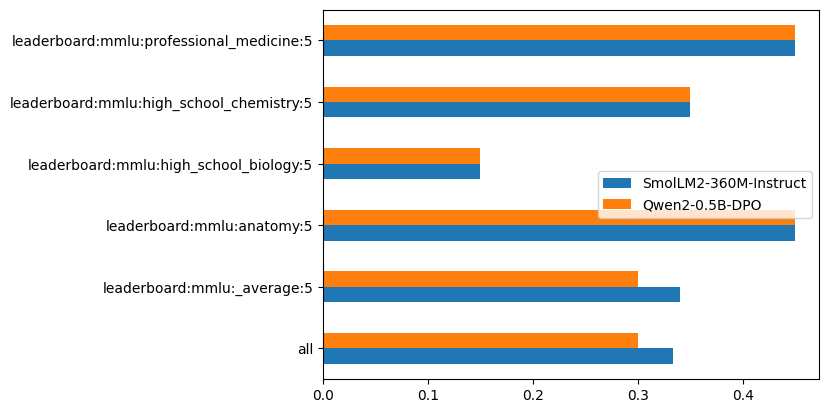

In [14]:
import pandas as pd

df = pd.DataFrame.from_records(smol_results["results"]).T["acc"].rename("SmolLM2-360M-Instruct")
_df = pd.DataFrame.from_records(qwen_results["results"]).T["acc"].rename("Qwen2-0.5B-DPO")
df = pd.concat([df, _df], axis=1)
df.plot(kind="barh")